In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd /content/drive/MyDrive/2023/splashlog

/content/drive/MyDrive/2023/splashlog


In [8]:
!ls

0927_make_yolo_annotations_main.ipynb  main_icons
230204_main_weapons		       scene_images


In [1]:
import glob
import re
import os
from PIL import Image,ImageOps,ImageFilter
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import unicodedata

# -*- coding: utf-8 -*-

yolo_size = 416

resize_size = (200, 200)


In [2]:
import gdown

url = "https://drive.google.com/file/d/13F6jmhNBTdv1FO20olbku0VPdwZb4dl_/view?usp=share_link"
output = "scene_images.zip"
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

KeyboardInterrupt: 

In [2]:
import subprocess
subprocess.run(['unzip',"-o", 'scene_images.zip'])

Archive:  scene_images.zip
   creating: scene_images/
  inflating: __MACOSX/._scene_images  
  inflating: scene_images/00000000_(2).jpg  
  inflating: __MACOSX/scene_images/._00000000_(2).jpg  
  inflating: scene_images/00000000_(3).jpg  
  inflating: __MACOSX/scene_images/._00000000_(3).jpg  
  inflating: scene_images/00000000_(4).jpg  
  inflating: __MACOSX/scene_images/._00000000_(4).jpg  
  inflating: scene_images/00000000_(5).jpg  
  inflating: __MACOSX/scene_images/._00000000_(5).jpg  
  inflating: scene_images/00000000_(6).jpg  
  inflating: __MACOSX/scene_images/._00000000_(6).jpg  
  inflating: scene_images/00000000_(7).jpg  
  inflating: __MACOSX/scene_images/._00000000_(7).jpg  
  inflating: scene_images/00000001.jpg  
  inflating: __MACOSX/scene_images/._00000001.jpg  
  inflating: scene_images/00000001_(2).jpg  
  inflating: __MACOSX/scene_images/._00000001_(2).jpg  
  inflating: scene_images/00000001_(3).jpg  
  inflating: __MACOSX/scene_images/._00000001_(3).jpg  
  infl

CompletedProcess(args=['unzip', '-o', 'scene_images.zip'], returncode=0)

In [3]:
base_images = glob.glob('../background_images/*.jpg')

base_images_length = len(base_images)

print(base_images_length)

icons = glob.glob('../chill_season_main_icons/*.png')

icon_images_length = len(icons)
print(len(icons))
print(icons)

4120
11
['../chill_season_main_icons/Inkbrush-Nouveau.png', '../chill_season_main_icons/Luna-Blaster-Neo.png', '../chill_season_main_icons/Dapple-Dualies-Nouveau.png', '../chill_season_main_icons/Zink-Mini-Splatling.png', '../chill_season_main_icons/Slosher-Deco.png', '../chill_season_main_icons/Carbon-Roller-Deco.png', '../chill_season_main_icons/Aerospray-RG.png', '../chill_season_main_icons/Tentatek-Splattershot.png', '../chill_season_main_icons/Forge-Splattershot-Pro.png', '../chill_season_main_icons/Custom-Splattershot-Jr.png', '../chill_season_main_icons/Splattershot-Nova.png']


In [4]:
class_list= []
for path in icons:
    #print(re.findall('/(.*)/', path))
    #print(re.findall('/(.*).png', path))
    print(re.findall('/(.*).png', path)[0].split("/")[1])

    class_list.append(re.findall('/(.*).png', path)[0].split("/")[1])
    #class_list.append(re.findall('/(.*).png', path)[0])
print(class_list)

f = open('weapon_list.txt', 'w')
for x in class_list:
    f.write(str(x) + "\n")
f.close()


Inkbrush-Nouveau
Luna-Blaster-Neo
Dapple-Dualies-Nouveau
Zink-Mini-Splatling
Slosher-Deco
Carbon-Roller-Deco
Aerospray-RG
Tentatek-Splattershot
Forge-Splattershot-Pro
Custom-Splattershot-Jr
Splattershot-Nova
['Inkbrush-Nouveau', 'Luna-Blaster-Neo', 'Dapple-Dualies-Nouveau', 'Zink-Mini-Splatling', 'Slosher-Deco', 'Carbon-Roller-Deco', 'Aerospray-RG', 'Tentatek-Splattershot', 'Forge-Splattershot-Pro', 'Custom-Splattershot-Jr', 'Splattershot-Nova']


In [16]:
import cv2
from PIL import ImageEnhance    #ImageEnhanceのインポート
def take_path_generate_dataset(weapons_dir_path):
    label_info = []
    #icon_type = re.findall('/(.*).png', path)[0].split("/")[0]
    base_path = base_images[random.randint(0, base_images_length-1)]
    base = Image.open(base_path)
    base= base.resize((resize_size)) # リサイズ
    base = base.filter(ImageFilter.BLUR)
    for i in range(0,1):
        logo_relative_positions = [random.uniform(-0.5, 0.0), random.uniform(-0.5, 0.0)]
        logo_position = (int(100*logo_relative_positions[0]), int(100*logo_relative_positions[1]))
        #base_path = base_images[random.randint(0, base_images_length)]

        label = random.choice(class_list)
        
        logo = Image.open(f'{weapons_dir_path}/{label}.png')
        logo_w, logo_h  = logo.size
        #while True:
        logo_scale_x = random.uniform(0.3, 0.7)
        logo_scale_y = random.uniform(0.3, 0.7)

        logo = logo.resize((int(logo_w * logo_scale_x), int(logo_h * logo_scale_y))) # リサイズ
            #print(logo.size)
            #if 200 <logo.size[0] < 300:
            #    break
        #オーグメンテーション
        #if random.randint(0,10) <2:
        #    logo = ImageOps.mirror(logo)
        #色のオーグメンテーション
        logo = ImageEnhance.Color(logo)

        logo = logo.enhance(random.uniform(0, 1))
        if random.randint(0,10) <2:
            logo = logo.rotate(random.randint(-10,10), expand=True)
        #if random.randint(0,10) <2:
        #    logo = logo.filter(ImageFilter.BLUR)
        
        base.paste(logo, logo_position, logo)

        #base = base.resize((yolo_size,yolo_size))
        resized_logo_w, resized_logo_h = logo.size
        #print(logo_relative_positions[0],logo_relative_positions[1],resized_logo_w/yolo_size, resized_logo_h/yolo_size)
        #label_info.append([str(icon_path_seed),str(logo_relative_positions[0]),str(logo_relative_positions[1]),str(resized_logo_w/yolo_size), str(resized_logo_h/yolo_size
    return label, base




Carbon-Roller-Deco


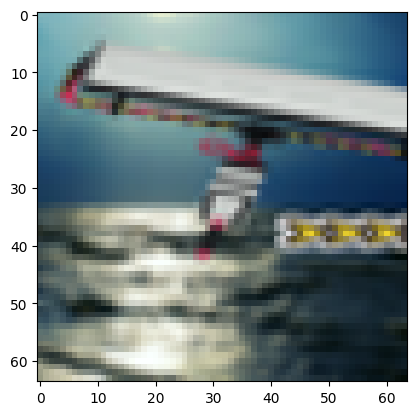

In [31]:
label, base = take_path_generate_dataset("../chill_season_main_icons")
print(label)
randomized_size = random.randint(32,64)
base = base.resize((randomized_size,randomized_size))
base = base.resize((64,64))
plt.imshow(np.array(base))
plt.show()

In [33]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

dataset_directory = "../230206_main_weapons_chill_seasons_better"
import os

if not os.path.exists(dataset_directory):
   os.makedirs(dataset_directory)

for i in range(1000):
        label, base = take_path_generate_dataset("../chill_season_main_icons")
        if not os.path.exists(f"{dataset_directory}/{label}"):
            print(f"{dataset_directory}/{label}")
            os.mkdir(f"{dataset_directory}/{label}")
        randomized_size = random.randint(32,64)
        base = base.resize((randomized_size,randomized_size))
        base = base.resize((64,64))
        base.save(f"{dataset_directory}/{label}/{time.time()}.jpg", quality=95)